In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [3]:
data=pd.read_csv('D:\\ETH.csv')

In [4]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [6]:
data.dtypes

Unix Timestamp      int64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object

In [16]:
#As the date is of object type, we need to change it to datetime format

data['Date']=pd.to_datetime(data['Date'],format="%Y-%m-%d %H:%M:%S")

In [21]:
data.head()

#now the date is in datetime64 datatype

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [29]:
#creating the day for the date columns
data['Day']=data['Date'].dt.day_name()

In [30]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Day
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125,Thursday
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,Wednesday
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279,Wednesday
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131,Wednesday
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622,Wednesday


In [33]:
data['Date'].max()

Timestamp('2020-04-16 00:00:00')

In [34]:
data['Date'].min()

Timestamp('2016-05-09 13:00:00')

In [35]:
# time delta of the analysis
data['Date'].max()-data['Date'].min()

Timedelta('1437 days 11:00:00')

In [38]:
#set the index to date
data.set_index('Date',inplace=True)

In [39]:
data

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,Day
Date,,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125,Thursday
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,Wednesday
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279,Wednesday
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131,Wednesday
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622,Wednesday
...,...,...,...,...,...,...,...,...
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213,Monday
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450,Monday
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567,Monday


In [40]:
#combining the data from whole day , as the data is in hours
data['High'].resample('D').max()

Date
2016-05-09     12.00
2016-05-10      9.96
2016-05-11     10.47
2016-05-12     12.00
2016-05-13     11.59
               ...  
2020-04-12    165.37
2020-04-13    159.51
2020-04-14    162.15
2020-04-15    161.52
2020-04-16    152.94
Freq: D, Name: High, Length: 1439, dtype: float64

In [66]:
#using data offsets for the whole day
#sum of all the volumes of transactions in a day
#max and min of the high and low per day

data_resample=data.resample('D').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})
data_resample

,Close,High,Low,Volume
Date,,,,
2016-05-09,9.712727,12.00,0.00,1342.902740
2016-05-10,9.589583,9.96,9.36,647.063759
2016-05-11,9.928333,10.47,9.68,3052.514465
2016-05-12,10.501667,12.00,9.92,2072.563187
2016-05-13,10.734583,11.59,10.20,1837.483874
...,...,...,...,...
2020-04-12,159.883333,165.37,155.21,12877.328335
2020-04-13,154.120833,159.51,150.12,15698.320976
2020-04-14,158.571250,162.15,155.74,18061.580220


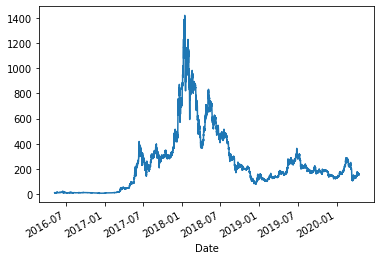

In [62]:
data['High'].plot()

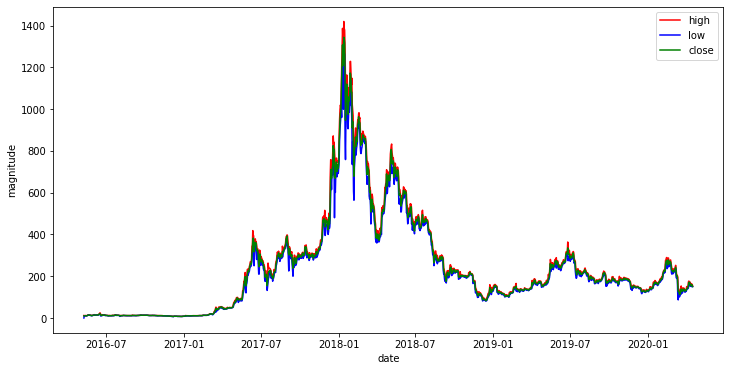

In [67]:
plt.figure(figsize=(12,6))
plt.plot(data_resample['High'],color='red',label='high')
plt.plot(data_resample['Low'],color='blue',label='low')
plt.plot(data_resample['Close'],color='green',label='close')

plt.xlabel('date')
plt.ylabel('magnitude')
plt.legend()
plt.show()

In [68]:
data_resample['2019':'2020']

,Close,High,Low,Volume
Date,,,,
2019-01-01,133.760000,140.92,128.72,22869.361349
2019-01-02,146.954167,156.83,138.78,50997.019332
2019-01-03,149.402917,154.39,144.48,20948.642982
2019-01-04,150.794167,155.46,145.11,34482.594088
2019-01-05,156.653750,160.70,152.02,23918.658818
...,...,...,...,...
2020-04-12,159.883333,165.37,155.21,12877.328335
2020-04-13,154.120833,159.51,150.12,15698.320976
2020-04-14,158.571250,162.15,155.74,18061.580220


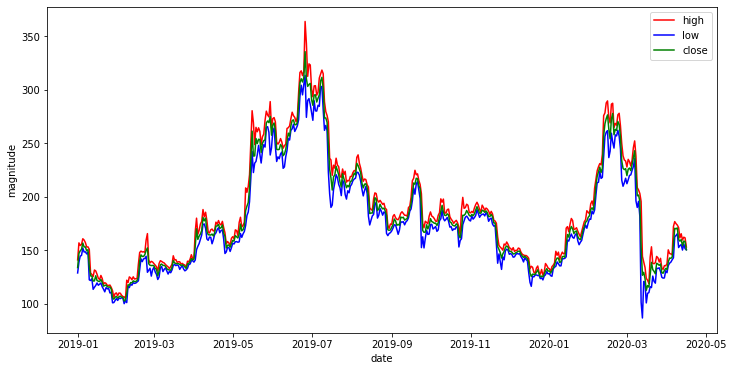

In [69]:
#plotting the data for only 2019 year

plt.figure(figsize=(12,6))
plt.plot(data_resample['2019':'2020']['High'],color='red',label='high')
plt.plot(data_resample['2019':'2020']['Low'],color='blue',label='low')
plt.plot(data_resample['2019':'2020']['Close'],color='green',label='close')

plt.xlabel('date')
plt.ylabel('magnitude')
plt.legend()
plt.show()

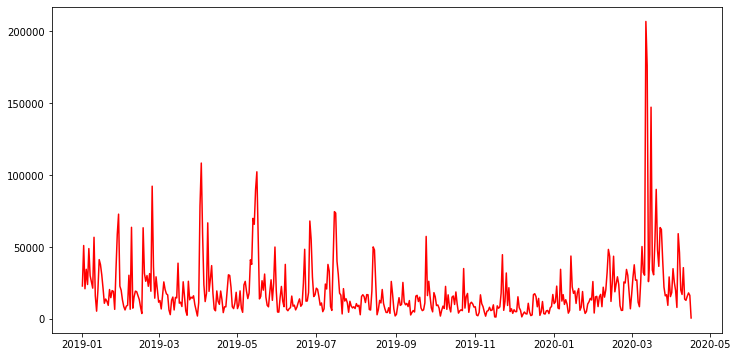

In [70]:
#plotting the vlume of trades
plt.figure(figsize=(12,6))
plt.plot(data_resample['2019':'2020']['Volume'],color='red',label='high')
plt.show()

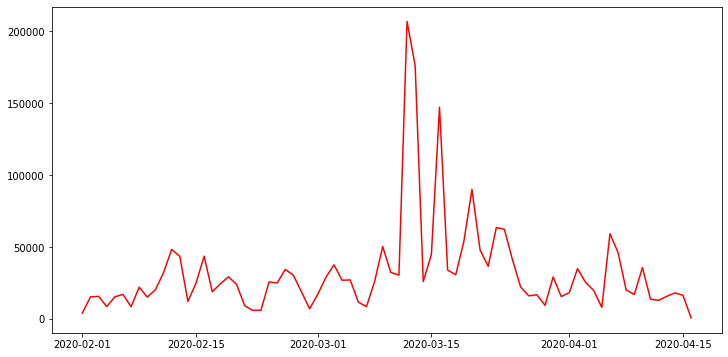

In [74]:
plt.figure(figsize=(12,6))
plt.plot(data_resample['2020-02':'2020-05']['Volume'],color='red',label='high')

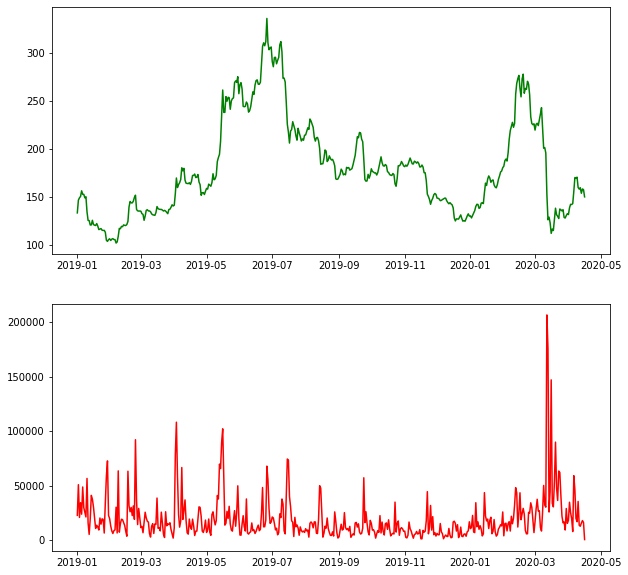

In [89]:


figure,axis=plt.subplots(2,figsize=(10,10))


axis[0].plot(data_resample['2019':'2020']['Close'],color='green',label='close')
axis[1].plot(data_resample['2019':'2020']['Volume'],color='red',label='volume')
plt.show()

In [92]:
#creating a new column for total value of sales

data_resample['total']=data_resample['Close']*data_resample['Volume']

In [93]:
data_resample

,Close,High,Low,Volume,total
Date,,,,,
2016-05-09,9.712727,12.00,0.00,1342.902740,1.304325e+04
2016-05-10,9.589583,9.96,9.36,647.063759,6.205072e+03
2016-05-11,9.928333,10.47,9.68,3052.514465,3.030638e+04
2016-05-12,10.501667,12.00,9.92,2072.563187,2.176537e+04
2016-05-13,10.734583,11.59,10.20,1837.483874,1.972462e+04
...,...,...,...,...,...
2020-04-12,159.883333,165.37,155.21,12877.328335,2.058870e+06
2020-04-13,154.120833,159.51,150.12,15698.320976,2.419438e+06
2020-04-14,158.571250,162.15,155.74,18061.580220,2.864047e+06


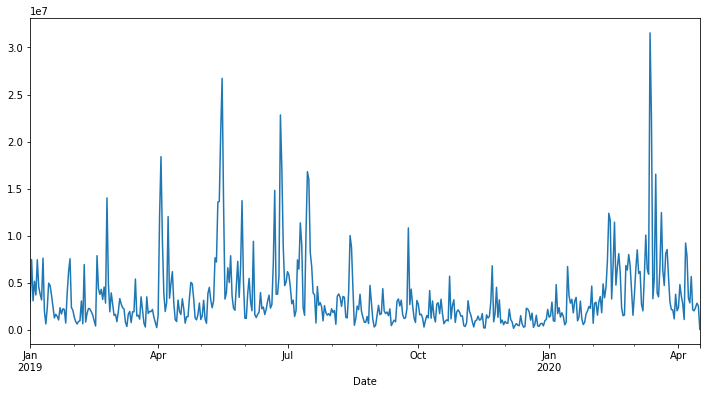

In [97]:
plt.figure(figsize=(12,6))
data_resample['2019':'2020']['total'].plot()